In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('sampledata.xlsx')
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
data.shape[:]

(100, 10)

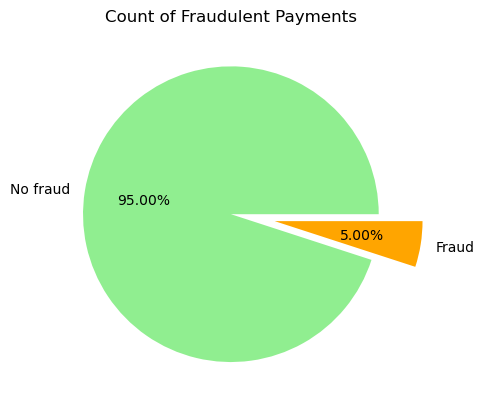

Number of normal transactions:  95
Number of fraud transactions:  5


In [4]:
b = data.fraud.value_counts()
plt.pie(b , autopct='%.2f%%', colors=['lightgreen', 'orange'], labels = ['No fraud','Fraud'], explode = (0, 0.3))
plt.title("Count of Fraudulent Payments")
plt.show()

df_fraud = data.loc[data.fraud == 1] 
df_non_fraud = data.loc[data.fraud == 0]
print("Number of normal transactions: ",df_non_fraud.fraud.count())
print("Number of fraud transactions: ",df_fraud.fraud.count())

In [5]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(data)

### Generating more rows on the basis of above data

In [6]:
sample = model.sample(540825)
sample.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1619755203','3','M','28007','M348934600','28007','es_transportation',28.20,0
1,0,'C583110837','2','F','28007','M348934600','28007','es_transportation',16.30,0
2,0,'C1255236689','5','F','28007','M348934600','28007','es_transportation',19.35,0
3,0,'C1156346576','2','F','28007','M348934600','28007','es_transportation',47.41,0
4,0,'C1655037147','4','M','28007','M348934600','28007','es_transportation',71.34,0


In [7]:
model = GaussianCopula(primary_key='customer')
model.fit(data)

In [8]:
from sdv.evaluation import evaluate
evaluate(sample, data, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.916927,0.916927,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,0.994343,0.994343,0.0,1.0,MAXIMIZE,None


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540825 entries, 0 to 540824
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         540825 non-null  int64  
 1   customer     540825 non-null  object 
 2   age          540825 non-null  object 
 3   gender       540825 non-null  object 
 4   zipcodeOri   540825 non-null  object 
 5   merchant     540825 non-null  object 
 6   zipMerchant  540825 non-null  object 
 7   category     540825 non-null  object 
 8   amount       540825 non-null  float64
 9   fraud        540825 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 41.3+ MB


In [10]:
sample.shape[:]

(540825, 10)

In [11]:
sample.describe()

,step,amount,fraud
count,540825.0,540825.000000,540825.000000
mean,0.0,42.413271,0.024993
std,0.0,31.367461,0.156105
min,0.0,0.930000,0.000000
25%,0.0,17.470000,0.000000
50%,0.0,35.990000,0.000000
75%,0.0,60.730000,0.000000
max,0.0,293.140000,1.000000


In [12]:
duplicates = sample[sample.duplicated(keep='first')]

In [13]:
duplicates

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
4945,0,'C1622124632','2','F','28007','M348934600','28007','es_transportation',4.79,0
5299,0,'C1332295774','2','F','28007','M348934600','28007','es_transportation',17.92,0
7567,0,'C1941625566','2','M','28007','M348934600','28007','es_transportation',4.13,0
8271,0,'C1315400589','2','M','28007','M348934600','28007','es_transportation',3.16,0
10173,0,'C1273110804','5','F','28007','M348934600','28007','es_transportation',25.45,0
...,...,...,...,...,...,...,...,...,...,...
540661,0,'C765155274','2','M','28007','M1823072687','28007','es_transportation',12.83,0
540731,0,'C1738944491','3','F','28007','M348934600','28007','es_transportation',95.78,0
540739,0,'C1161949399','2','M','28007','M348934600','28007','es_transportation',5.10,0
540745,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',8.71,0


In [17]:
sample = sample.drop_duplicates()

In [18]:
duplicates = sample[sample.duplicated(keep='first')]

In [19]:
duplicates

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


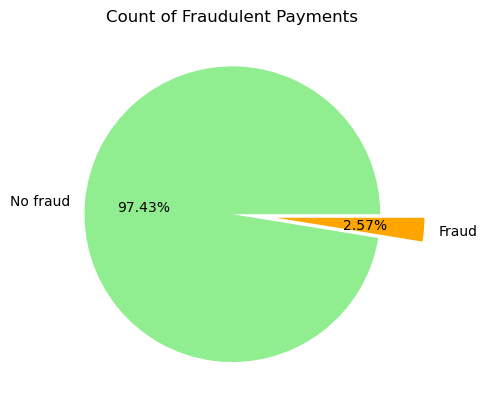

Number of normal transactions:  511642
Number of fraud transactions:  13513


In [20]:
a = sample.fraud.value_counts()
plt.pie(a , autopct='%.2f%%', colors=['lightgreen', 'orange'], labels = ['No fraud','Fraud'], explode = (0, 0.3))
plt.title("Count of Fraudulent Payments")
plt.show()

df_fraud = sample.loc[sample.fraud == 1] 
df_non_fraud = sample.loc[sample.fraud == 0]
print("Number of normal transactions: ",df_non_fraud.fraud.count())
print("Number of fraud transactions: ",df_fraud.fraud.count())


In [21]:
sample.shape[:]

(525155, 10)